<div class="clearfix" style="padding: 10px; padding-left: 0px">
<img src="https://raw.githubusercontent.com/jupyter/nature-demo/master/images/jupyter-logo.png" width="100px" style="display: inline-block; margin-top: 10px;">
<a href="https://mybinder.org"><img src="https://mybinder.org/static/logo.svg" width="120px" class="pull-right" style="display: inline-block; margin: 0px;"></a>
</div>

# Special Functions and Integration in SciPy

This notebook is a part of [Lectures on scientific computing with Python](http://github.com/jrjohansson/scientific-python-lectures) by [J.R. Johansson](http://jrjohansson.github.io). 

<div class="alert alert-info" role="alert" style="margin: 10px">
<p>This notebook is running on a server that was <b>launched just for you</b>. Your changes will be reset once server restarts due to inactivity, so don't rely on it for anything you want to last.
</p>
</div>

Your server is hosted thanks to [binder](https://mybinder.org), service that allows you to create custom computing environments based on GitHub repositories.

In [1]:
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
from scipy import *
%config InlineBackend.figure_formats = ["retina"]

## Special functions

A large number of mathematical special functions are important for many computional physics problems. SciPy provides implementations of a very extensive set of special functions. For details, see the list of functions in the reference documention at http://docs.scipy.org/doc/scipy/reference/special.html#module-scipy.special. 

To demonstrate the typical usage of special functions we will look in more detail at the Bessel functions:

In [2]:
#
# The scipy.special module includes a large number of Bessel-functions
# Here we will use the functions jn and yn, which are the Bessel functions 
# of the first and second kind and real-valued order. We also include the 
# function jn_zeros and yn_zeros that gives the zeroes of the functions jn
# and yn.
#
from scipy.special import jn, yn, jn_zeros, yn_zeros

In [3]:
n = 0    # order
x = 0.0

# Bessel function of first kind
print("J_{:d}({:f}) = {:f}".format(n, x, jn(n, x)))

x = 1.0
# Bessel function of second kind
print("Y_{:d}({:f}) = {:f}".format(n, x, yn(n, x)))

J_0(0.000000) = 1.000000
Y_0(1.000000) = 0.088257


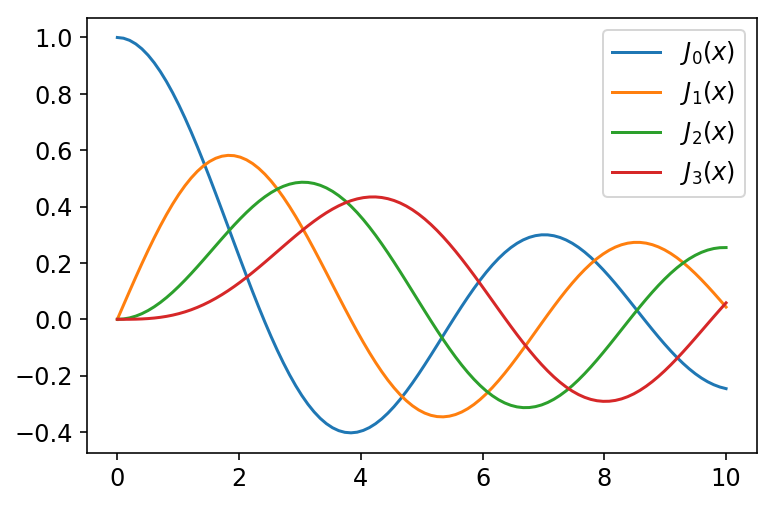

In [4]:
# Restoring font size.
matplotlib.rcParams.update({'font.size': 12, 'font.family': 'sans'})

x = linspace(0, 10, 100)

fig, ax = plt.subplots()
for n in range(4):
    ax.plot(x, jn(n, x), label=r"$J_{:d}(x)$".format(n))
ax.legend();

In [5]:
# zeros of Bessel functions
n = 0 # order
m = 4 # number of roots to compute
jn_zeros(n, m)

array([ 2.40482556,  5.52007811,  8.65372791, 11.79153444])

## Integration

### Numerical integration: quadrature

Numerical evaluation of a function of the type

$\displaystyle \int_a^b f(x) dx$

is called *numerical quadrature*, or simply *quadature*. SciPy provides a series of functions for different kind of quadrature, for example the `quad`, `dblquad` and `tplquad` for single, double and triple integrals, respectively.



In [6]:
from scipy.integrate import quad, dblquad, tplquad

The `quad` function takes a large number of optional arguments, which can be used to fine-tune the behaviour of the function (try `help(quad)` for details).

The basic usage is as follows:

In [7]:
# define a simple function for the integrand
def f(x):
    return x

In [8]:
x_lower = 0 # the lower limit of x
x_upper = 1 # the upper limit of x

val, abserr = quad(f, x_lower, x_upper)

print("integral value =", val, ", absolute error =", abserr)

integral value = 0.5 , absolute error = 5.551115123125783e-15


If we need to pass extra arguments to integrand function we can use the `args` keyword argument:

In [9]:
def integrand(x, n):
    """
    Bessel function of first kind and order n. 
    """
    return jn(n, x)


x_lower = 0  # the lower limit of x
x_upper = 10 # the upper limit of x

val, abserr = quad(integrand, x_lower, x_upper, args=(3,))

print(val, abserr)

0.7366751370811073 9.389126882496403e-13


For simple functions we can use a lambda function (name-less function) instead of explicitly defining a function for the integrand:

In [10]:
val, abserr = quad(lambda x: exp(-x ** 2), -Inf, Inf)

print("numerical  =", val, abserr)

analytical = sqrt(pi)
print("analytical =", analytical)

numerical  = 1.7724538509055159 1.4202636780944923e-08
analytical = 1.7724538509055159


As show in the example above, we can also use 'Inf' or '-Inf' as integral limits.

Higher-dimensional integration works in the same way:

In [11]:
def integrand(x, y):
    return exp(-x**2-y**2)

x_lower = 0  
x_upper = 10
y_lower = 0
y_upper = 10

val, abserr = dblquad(integrand, x_lower, x_upper, lambda x : y_lower, lambda x: y_upper)

print(val, abserr)

0.7853981633974476 1.3753098510218528e-08


Note how we had to pass lambda functions for the limits for the y integration, since these in general can be functions of x.

## Further reading

* Check out more introductory notebooks in **Juno**!
* http://www.scipy.org - The official web page for the SciPy project.
* http://docs.scipy.org/doc/scipy/reference/tutorial/index.html - A tutorial on how to get started using SciPy. 
* https://github.com/scipy/scipy/ - The SciPy source code. 

## Versions

In [12]:
%reload_ext version_information

%version_information numpy, matplotlib, scipy

Software versions
Python 3.6.5 64bit [GCC 4.2.1 Compatible Clang 4.0.1 (tags/RELEASE_401/final)]
IPython 7.3.0
OS Darwin 18.5.0 x86_64 i386 64bit
numpy 1.16.2
matplotlib 3.0.3
scipy 1.2.1
Tue Apr 30 09:00:55 2019 BST